# Epistemic Network Model

## Notes

### Model

The basic setup of Bala and Goyal’s model is that there is **a group
of simple agents** — highly idealized representations of scientists, or
knowledge seekers — who are **trying to choose between two actions**
and who use information gathered by themselves and by others to
make this choice. The two actions are assumed to differ in how
likely they are to yield a desired outcome. This could represent the
choice between eating fish or not and so increasing or decreasing
one’s risk of mercury poisoning; or it could be regulating smokestack
emissions and so increasing or decreasing the risks of acid rain.
For a very simple example, imagine someone faced with two slot
machines, trying to figure out which one pays out more often.  

Over a series of rounds, each scientist in the model chooses one
action or the other. They **make their choices on the basis of what
they currently believe about the problem, and they record the results
of their actions.** To begin with, the scientists are not sure about
which action is more likely to yield the desired outcome. But as they
make their choices, they gradually see what sorts of outcomes each
action yields. These **outcomes are the evidence they use to update
their beliefs.** Importantly, each scientist develops beliefs based not
only on the outcomes of their own actions, but also on those of
their colleagues and friends.  

We have an abstract
network consisting of a collection of “nodes,” each of which may or
may not be connected to other nodes by what is called an “edge.” Each node represents a scientist, and each edge connects two scientists
who have access to each other’s results.
These networks can take different shapes. **These structures are often important in determining how information
and ideas flow through a group.**

We should also emphasize that, although our examples come
from science and we are calling the agents in our model “scientists,”
these models can represent any group of people who are trying to
make their way in an unpredictable world. All of us act as scientists
sometimes, when we make decisions based on our own experiences
and those of our friends. Ever buy a car? There is a good chance
that you took it for a test drive and asked the dealer some questions.
You were gathering evidence before making a decision.


### Agents (Scientists)
In the model,
each node — each scientist — is associated with a number between 0
and 1. This number represents the scientist’s level of certainty, or
credence, that action B is better than action A. An assignment of .7
would mean that particular scientist thinks there is a 70 percent
chance that action B is better than action A. Which action the scientist
takes is wholly determined by this number. If it is greater
than .5, the scientist performs action B — by which we mean that we
simulate pulling a slot machine some number of times and counting
the number of times it pays off. Then we use Bayes’ rule to
update the scientist’s credence in light of this result, and likewise
update the credences of all of the other neighboring scientists on
the network.
If the scientist’s belief is less than .5, he or she performs action
A. In the simplest version of the model, we assume that everyone
knows that this action works exactly half the time. (When credences exactly equal .5, we also have the agent choose action A, but
this essentially never happens.) **Any
one
connected to someone who tried action B—the new, unknown
treatment—will update their beliefs.**  

**This process continues stepwise (try actions, update credences,
try actions, update credences) until the scientists have converged on
a consensus.** This can happen if all of the scientists have sufficiently
high credence—greater than .99—that action B is better; or all of them have sufficiently low credence, less than .5, so that no one in
the network ever performs action B, in which case they will not
learn anything further about it. In the first case, we say the network
has converged to the true belief. In the second, we say it has converged
to the false one.  

In general, these models tend to converge
to the true consensus—that is, the whole network comes to believe
that action B is better. But sometimes go to the
false one.22
What we want to understand is this: **Under what circumstances
do networks of scientists converge to false beliefs?**



### Actions
In the model, one of the two actions — call it action B — is, in fact,
better than action A. (To keep this straight, remember that A is for
“All right,” but B is for “Better.”) But figuring out which action is
superior is not necessarily easy. **A crucial assumption in this model
is that evidence is probabilistic**, meaning that when the scientists
investigate the world — test a slot machine or warn a sick patient off
fish — the results are not always the same. **Action B is better than
action A because, on average, it yields better results.** But there can
be many individual instances when action A happens to yield a better
result.
In this way, we can think of action B as similar to a biased coin.
It may land heads up more often than an ordinary coin — but that
does not mean that it never lands tails up. And if you flip a biased
coin and an unbiased coin some number of times, there is no guarantee
that the biased one will land heads up more often. It is merely
likely that it will do so.


### Zollman effect
This trade-off, where connections propagate true beliefs but
also open channels for the spread of misleading evidence, means
that sometimes it is actually better for a group of scientists to communicate
less, especially when they work on a hard problem. This
phenomenon, in which scientists improve their beliefs by failing to
communicate, is known as the “Zollman effect,” after Kevin Zollman,
who discovered it.28 If everybody shares evidence, a chance
string of bad data can persuade the entire group to abandon the
correct theory. But in a group where not everyone listens to everyone
else, pockets of scientists can be protected from misleading
data and continue to gather evidence on the true belief that eventually
persuades the rest of the community.


### Network structure remarks
1. Real human networks are often “small worlds,” which tend to have interconnected
cliques and short path lengths between any two nodes. Granovetter
(1973) conceived of human networks as consisting of tight-knit cliques connected
by bridges. Watts and Strogatz (1998) developed their famous “small
world” networks to try to capture realistic aspects of human networks. Onnela
et al. (2007) observe such structures among cell phone users. Newman
(2001) finds the same for scientific collaboration networks.
2. The harder the problem, the more potential social structure has to
influence the outcome. (Zollman effect; Rosenstock, Bruner, and O’Connor (2016) show that Zollman’s research on
connectivity and consensus is sensitive to parameter values and that, in particular,
in communities where scientists gather large data sets and data is more reliable, it is better to always communicate this data)


### Other remarks
1. The social spread of knowledge is a double-edged sword. It gives us
remarkable capabilities, as a species, to develop sophisticated knowledge
about the world, but it also opens the door to the spread of
false belief.

## Modules

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
cd ..

C:\Users\Damian\Studia\Danologia\Magisterka\depinet\DEpiNet


In [15]:
from src.epinet.agent import Agent
from src.epinet.models import StaticEpistemicNetwork, DynamicEpistemicNetwork
from src.epinet.simulation import Simulation, CogsnetSimulation
from src.visualizations.visualizations import plot_network

### Agent

In [16]:
a = Agent('1', 0.5, [])
print(f'Base credence: {a.credence}')
a.update_credence(10, 6, 0.1)
print(f'Credence after update: {a.credence}')

2021-05-10 23:24:22,388 — src.epinet.agent — INFO — __init__:18  —  Agent 1 created successfully!
Base credence: 0.5
Credence after update: 0.6923076923076922


### Static Network

1. Graph edges: {0: [1, 2], 1: [0], 2: [0]}
2021-05-10 23:24:30,733 — src.epinet.agent — INFO — __init__:18  —  Agent 0 created successfully!
2021-05-10 23:24:30,734 — src.epinet.agent — INFO — __init__:18  —  Agent 1 created successfully!
2021-05-10 23:24:30,734 — src.epinet.agent — INFO — __init__:18  —  Agent 2 created successfully!
2. Agents details
 -> Agent 0, cred: 0.45, trials_nr: 0, succ_nr: 0, neighbours: [1, 2]
 -> Agent 1, cred: 0.12, trials_nr: 0, succ_nr: 0, neighbours: [0]
 -> Agent 2, cred: 0.26, trials_nr: 0, succ_nr: 0, neighbours: [0]
3. Consensus check: True


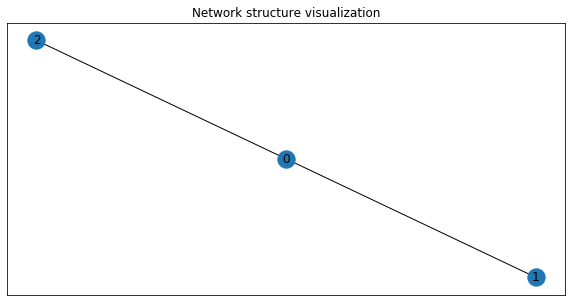

In [17]:
import networkx as nx

# Create craph structure
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2)])
l = nx.convert.to_dict_of_lists(G)
print(f'1. Graph edges: {l}')

alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

# Create epostemic network
g = StaticEpistemicNetwork(l, alpha_payoff, beta_payoff, cons_threshold, nr_trials)
print('2. Agents details')
g.print_agents()
print(f'3. Consensus check: {g.is_consensus()}')
plot_network(g, 'Network structure visualization')

### Dynamic Network

2021-05-10 23:26:20,512 — src.epinet.agent — INFO — __init__:18  —  Agent 0 created successfully!
2021-05-10 23:26:20,513 — src.epinet.agent — INFO — __init__:18  —  Agent 1 created successfully!
2021-05-10 23:26:20,513 — src.epinet.agent — INFO — __init__:18  —  Agent 2 created successfully!
2021-05-10 23:26:20,514 — src.epinet.agent — INFO — __init__:18  —  Agent 3 created successfully!
Step 1:
  1. Graph edges: {0: [1, 2], 1: [0], 2: [0, 3], 3: [2]}
  2. Agents details
 -> Agent 0, cred: 0.42, trials_nr: 0, succ_nr: 0, neighbours: [1, 2]
 -> Agent 1, cred: 0.97, trials_nr: 0, succ_nr: 0, neighbours: [0]
 -> Agent 2, cred: 0.72, trials_nr: 0, succ_nr: 0, neighbours: [0, 3]
 -> Agent 3, cred: 0.79, trials_nr: 0, succ_nr: 0, neighbours: [2]
  3. Consensus check: False
  4. State: Correct Disagreement
  5. Mean credence: 0.7243852930869453
  6. Action voters: (1, 3)


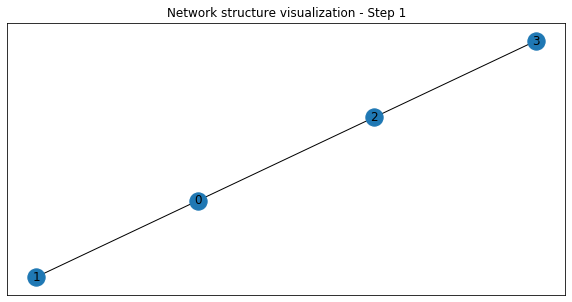

2021-05-10 23:26:20,717 — src.epinet.models — INFO — update_structure:178  —  Agents to detach: set()
2021-05-10 23:26:20,717 — src.epinet.models — INFO — update_structure:178  —  Agents to detach: set()
2021-05-10 23:26:20,719 — src.epinet.models — INFO — update_structure:179  —  Agents to update: {0, 1, 2, 3}
2021-05-10 23:26:20,719 — src.epinet.models — INFO — update_structure:179  —  Agents to update: {0, 1, 2, 3}
2021-05-10 23:26:20,720 — src.epinet.models — INFO — update_structure:180  —  Agents to create: set()
2021-05-10 23:26:20,720 — src.epinet.models — INFO — update_structure:180  —  Agents to create: set()
Step 2:
  1. Graph edges: {0: [1, 2], 1: [0, 2], 2: [0, 3, 1], 3: [2]}
  2. Agents details
 -> Agent 0, cred: 0.42, trials_nr: 0, succ_nr: 0, neighbours: [1, 2]
 -> Agent 1, cred: 0.97, trials_nr: 0, succ_nr: 0, neighbours: [0, 2]
 -> Agent 2, cred: 0.72, trials_nr: 0, succ_nr: 0, neighbours: [0, 3, 1]
 -> Agent 3, cred: 0.79, trials_nr: 0, succ_nr: 0, neighbours: [2]
  3

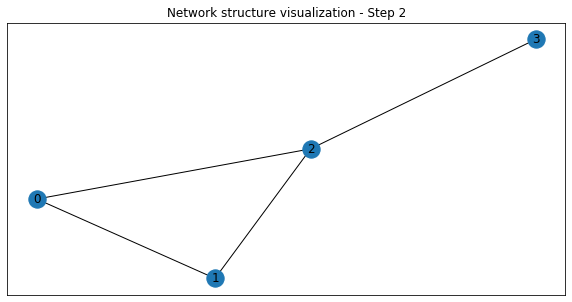

2021-05-10 23:26:20,925 — src.epinet.models — INFO — update_structure:178  —  Agents to detach: set()
2021-05-10 23:26:20,925 — src.epinet.models — INFO — update_structure:178  —  Agents to detach: set()
2021-05-10 23:26:20,926 — src.epinet.models — INFO — update_structure:179  —  Agents to update: {0, 1, 2, 3}
2021-05-10 23:26:20,926 — src.epinet.models — INFO — update_structure:179  —  Agents to update: {0, 1, 2, 3}
2021-05-10 23:26:20,927 — src.epinet.models — INFO — update_structure:180  —  Agents to create: set()
2021-05-10 23:26:20,927 — src.epinet.models — INFO — update_structure:180  —  Agents to create: set()
Step 3:
  1. Graph edges: {0: [1, 2, 3], 1: [0, 2], 2: [0, 3, 1], 3: [2, 0]}
  2. Agents details
 -> Agent 0, cred: 0.42, trials_nr: 0, succ_nr: 0, neighbours: [1, 2, 3]
 -> Agent 1, cred: 0.97, trials_nr: 0, succ_nr: 0, neighbours: [0, 2]
 -> Agent 2, cred: 0.72, trials_nr: 0, succ_nr: 0, neighbours: [0, 3, 1]
 -> Agent 3, cred: 0.79, trials_nr: 0, succ_nr: 0, neighbours

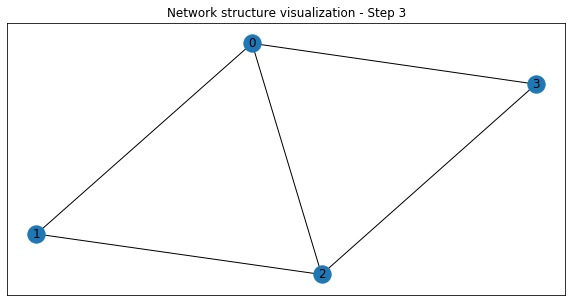

In [20]:
import networkx as nx

# Create craph structure
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (2, 3)])
l1 = nx.convert.to_dict_of_lists(G)

G.add_edges_from([(1, 2)])
l2 = nx.convert.to_dict_of_lists(G)

G.add_edges_from([(0, 3)])
l3 = nx.convert.to_dict_of_lists(G)

# Create epostemic network
alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

g = DynamicEpistemicNetwork(l1, alpha_payoff, beta_payoff, cons_threshold, nr_trials)
print('Step 1:')
print(f'  1. Graph edges: {l1}')
print('  2. Agents details')
g.print_agents()
print(f'  3. Consensus check: {g.is_consensus()}')
print(f'  4. State: {g.get_state()}')
print(f'  5. Mean credence: {g.get_mean_credence()}')
print(f'  6. Action voters: {g.get_actions_voters_nr()}')
plot_network(g, 'Network structure visualization - Step 1')

g.update_structure(l2)
print('Step 2:')
print(f'  1. Graph edges: {l2}')
print('  2. Agents details')
g.print_agents()
print(f'  3. Consensus check: {g.is_consensus()}')
print(f'  4. State: {g.get_state()}')
print(f'  5. Mean credence: {g.get_mean_credence()}')
print(f'  6. Action voters: {g.get_actions_voters_nr()}')
plot_network(g, 'Network structure visualization - Step 2')

g.update_structure(l3)
print('Step 3:')
print(f'  1. Graph edges: {l3}')
print('  2. Agents details')
g.print_agents()
print(f'  3. Consensus check: {g.is_consensus()}')
print(f'  4. State: {g.get_state()}')
print(f'  5. Mean credence: {g.get_mean_credence()}')
print(f'  6. Action voters: {g.get_actions_voters_nr()}')
plot_network(g, 'Network structure visualization - Step 3')

In [21]:
g.get_status()

[('Correct Disagreement',
  1,
  3,
  0.7243852930869453,
  1,
  0,
  'Correct Disagreement',
  1,
  3,
  0.7243852930869453)]

#### Network updating experiments

In [ ]:
structure = {
    0: [1, 2],
    1: [],
    3: [4],
    4: [5, 1]
}

In [84]:
structure = step_to_adjacency_list_2[2]
g = nx.Graph(structure)
undirected_structure = nx.convert.to_dict_of_lists(g)
pp.pprint(undirected_structure)



{13116: [62555, 94795, 60830],
 20905: [69669],
 22931: [60830],
 30952: [60830],
 60830: [75178, 30952, 13116, 97655, 95135, 22931],
 62555: [13116],
 69669: [20905, 97655],
 75178: [60830],
 94795: [13116],
 95135: [60830],
 97655: [60830, 69669]}


### Simulation for static network

In [26]:
# Create epistemic network
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (3, 4), (2, 4), (5, 6)])
l = nx.convert.to_dict_of_lists(G)

alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

g = StaticEpistemicNetwork(l, alpha_payoff, beta_payoff, cons_threshold, nr_trials)

# Run simulation
s = Simulation(g, 10)
sim_res = s.run(verbose=True)

2021-05-10 23:28:36,178 — src.epinet.agent — INFO — __init__:18  —  Agent 0 created successfully!
2021-05-10 23:28:36,179 — src.epinet.agent — INFO — __init__:18  —  Agent 1 created successfully!
2021-05-10 23:28:36,180 — src.epinet.agent — INFO — __init__:18  —  Agent 2 created successfully!
2021-05-10 23:28:36,181 — src.epinet.agent — INFO — __init__:18  —  Agent 3 created successfully!
2021-05-10 23:28:36,182 — src.epinet.agent — INFO — __init__:18  —  Agent 4 created successfully!
2021-05-10 23:28:36,183 — src.epinet.agent — INFO — __init__:18  —  Agent 5 created successfully!
2021-05-10 23:28:36,184 — src.epinet.agent — INFO — __init__:18  —  Agent 6 created successfully!
Agents details
 -> Agent 0, cred: 0.75, trials_nr: 10, succ_nr: 5, neighbours: [1, 2]
 -> Agent 1, cred: 0.54, trials_nr: 10, succ_nr: 3, neighbours: [0, 3]
 -> Agent 2, cred: 0.99, trials_nr: 10, succ_nr: 6, neighbours: [0, 4]
 -> Agent 3, cred: 0.98, trials_nr: 10, succ_nr: 6, neighbours: [1, 4]
 -> Agent 4, cr

In [27]:
s.network.get_status()

[('Correct Disagreement',
  2,
  5,
  0.7789954351413374,
  2,
  0,
  'Correct Consensus',
  0,
  5,
  0.9999999999963837),
 ('Correct Disagreement',
  2,
  5,
  0.7789954351413374,
  2,
  1,
  'Incorrect Consensus',
  2,
  0,
  0.2264840230037216)]

### Zollman effect

In [41]:
# TODO: run

## Cogsnet

### Loading data

In [77]:
import pickle

with open('data/processed/step_to_adjacency_list.pickle', 'rb') as handle:
    step_to_adjacency_list = pickle.load(handle)

In [78]:
from collections import Counter

lens = [len(val) for val in step_to_adjacency_list[160].values()]
print(Counter(lens))

Counter({0: 89, 1: 49, 2: 31, 4: 13, 3: 12, 5: 4, 6: 1})


### Removing empty records

In [80]:
step_to_adjacency_list_2 = {}
for k in step_to_adjacency_list.keys():
    step_to_adjacency_list_2[k] = {int(key): [int(v) for v in val] for key, val in step_to_adjacency_list[k].items() if val}

In [81]:
g = nx.Graph(step_to_adjacency_list_2[1])

In [82]:
l1 = nx.convert.to_dict_of_lists(g)

In [83]:
l1

{20905: [13116, 60830, 75178, 30952],
 30952: [60830, 20905, 75178],
 60830: [20905, 30952, 75178, 13116, 97655, 95135],
 75178: [20905, 60830, 30952],
 13116: [20905, 60830],
 97655: [60830],
 95135: [60830]}

### Change from directed to undirected

In [ ]:
step_to_adjacency_list_3 = {}
for k in step_to_adjacency_list_2.keys():
    

## Epistemic network based on Cogsnet structure

In [85]:
from src.epinet.agent import Agent
from src.epinet.models import StaticEpistemicNetwork, DynamicEpistemicNetwork
from src.epinet.simulation import Simulation, CogsnetSimulation
from src.visualizations.visualizations import plot_network
from src.utils import logger

2021-05-11 00:19:41,716 — src.epinet.agent — INFO — __init__:18  —  Agent 20905 created successfully!
2021-05-11 00:19:41,717 — src.epinet.agent — INFO — __init__:18  —  Agent 30952 created successfully!
2021-05-11 00:19:41,718 — src.epinet.agent — INFO — __init__:18  —  Agent 60830 created successfully!
2021-05-11 00:19:41,718 — src.epinet.agent — INFO — __init__:18  —  Agent 75178 created successfully!
2021-05-11 00:19:41,719 — src.epinet.agent — INFO — __init__:18  —  Agent 13116 created successfully!
2021-05-11 00:19:41,720 — src.epinet.agent — INFO — __init__:18  —  Agent 97655 created successfully!
2021-05-11 00:19:41,720 — src.epinet.agent — INFO — __init__:18  —  Agent 95135 created successfully!


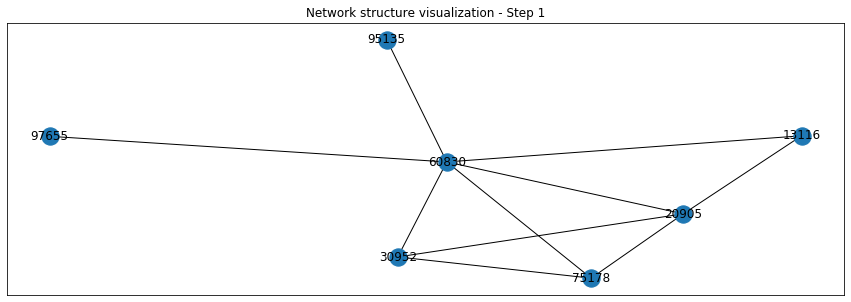

{13116: [62555, 94795, 60830], 60830: [75178, 30952, 13116, 97655, 95135, 22931], 62555: [13116], 69669: [20905, 97655], 94795: [13116], 75178: [60830], 30952: [60830], 97655: [60830, 69669], 95135: [60830], 22931: [60830], 20905: [69669]}
2021-05-11 00:19:41,942 — src.epinet.models — INFO — update_structure:194  —  Agents to detach: set()
2021-05-11 00:19:41,942 — src.epinet.models — INFO — update_structure:194  —  Agents to detach: set()
2021-05-11 00:19:41,943 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {30952, 20905, 75178, 97655, 13116, 60830, 95135}
2021-05-11 00:19:41,943 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {30952, 20905, 75178, 97655, 13116, 60830, 95135}
2021-05-11 00:19:41,944 — src.epinet.models — INFO — update_structure:196  —  Agents to create: {62555, 94795, 22931, 69669}
2021-05-11 00:19:41,944 — src.epinet.models — INFO — update_structure:196  —  Agents to create: {62555, 94795, 22931, 69669}
2021-05-11 00:

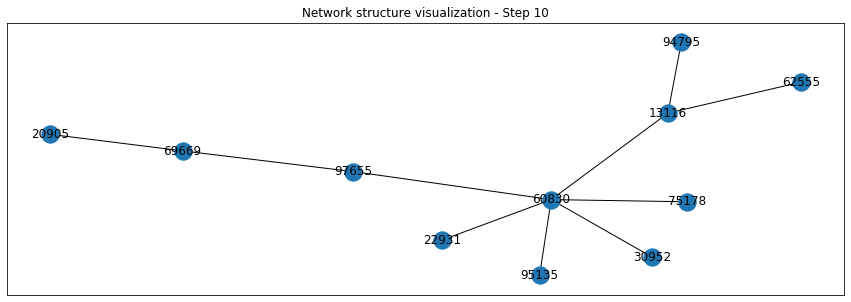

 -> Agent 20905, cred: 0.56, trials_nr: 0, succ_nr: 0, neighbours: [69669]
 -> Agent 30952, cred: 0.02, trials_nr: 0, succ_nr: 0, neighbours: [60830]
 -> Agent 60830, cred: 0.57, trials_nr: 0, succ_nr: 0, neighbours: [75178, 30952, 13116, 97655, 95135, 22931]
 -> Agent 75178, cred: 0.24, trials_nr: 0, succ_nr: 0, neighbours: [60830]
 -> Agent 13116, cred: 0.26, trials_nr: 0, succ_nr: 0, neighbours: [62555, 94795, 60830]
 -> Agent 97655, cred: 0.46, trials_nr: 0, succ_nr: 0, neighbours: [60830, 69669]
 -> Agent 95135, cred: 0.84, trials_nr: 0, succ_nr: 0, neighbours: [60830]
 -> Agent 62555, cred: 0.25, trials_nr: 0, succ_nr: 0, neighbours: [13116]
 -> Agent 94795, cred: 0.22, trials_nr: 0, succ_nr: 0, neighbours: [13116]
 -> Agent 22931, cred: 0.49, trials_nr: 0, succ_nr: 0, neighbours: [60830]
 -> Agent 69669, cred: 0.94, trials_nr: 0, succ_nr: 0, neighbours: [20905, 97655]


In [86]:
alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

g = DynamicEpistemicNetwork(step_to_adjacency_list_2[1], alpha_payoff, beta_payoff, cons_threshold, nr_trials)
plot_network(g, 'Network structure visualization - Step 1', (15, 5))

g.update_structure(step_to_adjacency_list_2[2])
plot_network(g, 'Network structure visualization - Step 10', (15, 5))

g.print_agents()

In [40]:
import pprint
pp = pprint.PrettyPrinter(width=120, compact=True)

In [60]:
pp.pprint(g.get_status())

[('Incorrect Disagreement', 6, 5, 0.4931518442993472, 1, 0, 11, 'Incorrect Disagreement', 6, 5, 0.4931518442993472)]


In [30]:
g.get_states_of_connected_components()

[(3, 'Incorrect Consensus'),
 (10, 'Correct Consensus'),
 (1, 'Correct Consensus'),
 (1, 'Correct Disagreement'),
 (1, 'Incorrect Consensus')]

2021-05-11 00:20:14,956 — src.epinet.agent — INFO — __init__:18  —  Agent 20905 created successfully!
2021-05-11 00:20:14,957 — src.epinet.agent — INFO — __init__:18  —  Agent 30952 created successfully!
2021-05-11 00:20:14,958 — src.epinet.agent — INFO — __init__:18  —  Agent 60830 created successfully!
2021-05-11 00:20:14,958 — src.epinet.agent — INFO — __init__:18  —  Agent 75178 created successfully!
2021-05-11 00:20:14,959 — src.epinet.agent — INFO — __init__:18  —  Agent 13116 created successfully!
2021-05-11 00:20:14,960 — src.epinet.agent — INFO — __init__:18  —  Agent 97655 created successfully!
2021-05-11 00:20:14,960 — src.epinet.agent — INFO — __init__:18  —  Agent 95135 created successfully!


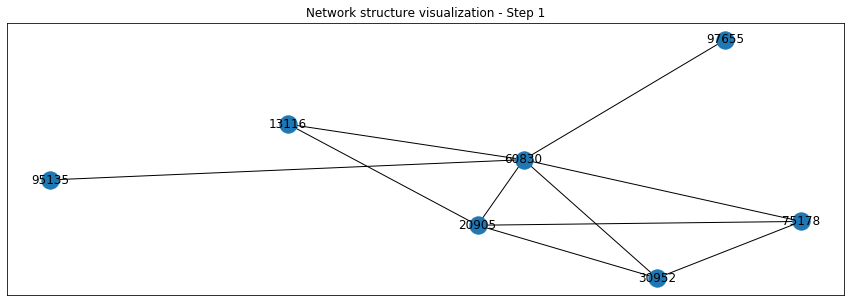

{10060: [85596], 10841: [88133, 17353, 63757, 39783], 11360: [44520, 95994, 40997], 11692: [11692, 48990], 13116: [62555, 94795, 20905, 30952, 60830, 97655, 26999], 13799: [77291, 62560], 13896: [46654], 14188: [31583, 75466, 16495], 14962: [68494, 97900], 16495: [14188, 16495, 68494, 52923], 17041: [73175, 45945, 74916], 17353: [10841], 18344: [20905], 18420: [40997, 53275], 18707: [36951], 19066: [19066, 96600, 60482, 38901], 19844: [99856, 45945], 20905: [13116, 18344, 69669, 95135, 94795, 76313], 21350: [47230, 66404], 22617: [38901], 22931: [22931, 60830, 30952, 39122], 23642: [98326, 50869], 24853: [31583, 99893], 25171: [15723], 25323: [18394], 26425: [72700], 26999: [13116, 94795, 75178], 29914: [46771, 45945], 30076: [37617], 30952: [13116, 60830, 95135, 75178, 22931, 91064], 33094: [38901, 71700], 34853: [48187, 67947], 36006: [57637], 36143: [96600], 36951: [18707], 37617: [30076, 37617, 40557, 52067, 69065], 38823: [38823, 47230], 38901: [22617, 33094, 62560, 57896, 19066, 

2021-05-11 00:20:15,203 — src.epinet.agent — INFO — __init__:18  —  Agent 36951 created successfully!
2021-05-11 00:20:15,204 — src.epinet.agent — INFO — __init__:18  —  Agent 10841 created successfully!
2021-05-11 00:20:15,205 — src.epinet.agent — INFO — __init__:18  —  Agent 22617 created successfully!
2021-05-11 00:20:15,205 — src.epinet.agent — INFO — __init__:18  —  Agent 23642 created successfully!
2021-05-11 00:20:15,206 — src.epinet.agent — INFO — __init__:18  —  Agent 62555 created successfully!
2021-05-11 00:20:15,206 — src.epinet.agent — INFO — __init__:18  —  Agent 85596 created successfully!
2021-05-11 00:20:15,207 — src.epinet.agent — INFO — __init__:18  —  Agent 11360 created successfully!
2021-05-11 00:20:15,208 — src.epinet.agent — INFO — __init__:18  —  Agent 62560 created successfully!
2021-05-11 00:20:15,208 — src.epinet.agent — INFO — __init__:18  —  Agent 97900 created successfully!
2021-05-11 00:20:15,209 — src.epinet.agent — INFO — __init__:18  —  Agent 40557 cr

2021-05-11 00:20:15,259 — src.epinet.agent — INFO — __init__:18  —  Agent 66991 created successfully!
2021-05-11 00:20:15,259 — src.epinet.agent — INFO — __init__:18  —  Agent 41393 created successfully!
2021-05-11 00:20:15,260 — src.epinet.agent — INFO — __init__:18  —  Agent 91064 created successfully!
2021-05-11 00:20:15,261 — src.epinet.agent — INFO — __init__:18  —  Agent 94652 created successfully!
2021-05-11 00:20:15,261 — src.epinet.agent — INFO — __init__:18  —  Agent 49597 created successfully!
2021-05-11 00:20:15,262 — src.epinet.agent — INFO — __init__:18  —  Agent 46021 created successfully!
2021-05-11 00:20:15,263 — src.epinet.agent — INFO — __init__:18  —  Agent 17353 created successfully!
2021-05-11 00:20:15,263 — src.epinet.agent — INFO — __init__:18  —  Agent 69065 created successfully!
2021-05-11 00:20:15,264 — src.epinet.agent — INFO — __init__:18  —  Agent 71627 created successfully!
2021-05-11 00:20:15,265 — src.epinet.agent — INFO — __init__:18  —  Agent 85970 cr

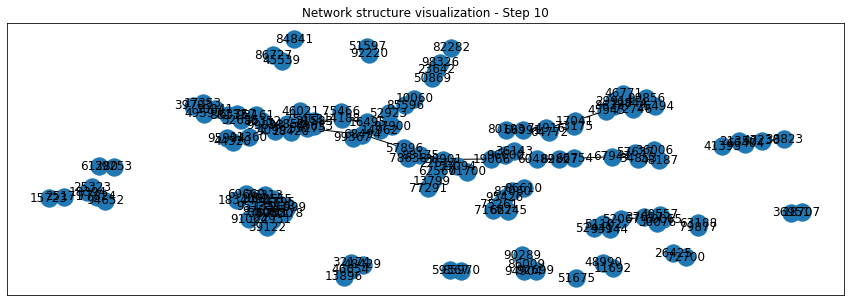

{10060: [85596, 51722], 10841: [88133, 39783, 40997, 68633, 11360, 68494], 11023: [15723], 11360: [10841, 40997, 53275, 30952], 11692: [11692, 95426], 13799: [62560], 13896: [63188], 14106: [25171], 14962: [97900, 77023, 78911, 48429], 15776: [25544], 16313: [15723], 16495: [16495, 68494, 52923], 17353: [44520], 18344: [97900, 77023], 18394: [25323, 77824, 85596, 74916], 19066: [19066, 96600, 24853], 19844: [45945, 46771, 71782, 50947], 20905: [95135, 76313, 78911], 21350: [47230], 22745: [45000], 22931: [22931, 60830, 50947], 23144: [57637, 98436], 23642: [98326, 50869, 91064, 46160], 24853: [99893, 19066], 25171: [14106], 25323: [18394, 64772], 25494: [52067, 51102, 72746], 25544: [15776, 78638], 25947: [59367, 88133], 26425: [95426, 32899], 26999: [13116, 94795], 29914: [46771, 46584, 48187], 30076: [37617], 30952: [11360, 60830, 95135, 13116], 31372: [67947, 50947], 31583: [38901], 32899: [26425], 33094: [38901], 34250: [34250], 35227: [68494, 63757], 36143: [75468], 37617: [30076,

2021-05-11 00:20:15,867 — src.epinet.agent — INFO — __init__:18  —  Agent 15776 created successfully!
2021-05-11 00:20:15,868 — src.epinet.agent — INFO — __init__:18  —  Agent 95400 created successfully!
2021-05-11 00:20:15,869 — src.epinet.agent — INFO — __init__:18  —  Agent 55594 created successfully!
2021-05-11 00:20:15,870 — src.epinet.agent — INFO — __init__:18  —  Agent 16313 created successfully!
2021-05-11 00:20:15,871 — src.epinet.agent — INFO — __init__:18  —  Agent 78911 created successfully!
2021-05-11 00:20:15,872 — src.epinet.agent — INFO — __init__:18  —  Agent 25544 created successfully!
2021-05-11 00:20:15,873 — src.epinet.agent — INFO — __init__:18  —  Agent 45000 created successfully!
2021-05-11 00:20:15,873 — src.epinet.agent — INFO — __init__:18  —  Agent 34250 created successfully!
2021-05-11 00:20:15,874 — src.epinet.agent — INFO — __init__:18  —  Agent 65102 created successfully!
2021-05-11 00:20:15,875 — src.epinet.agent — INFO — __init__:18  —  Agent 98639 cr

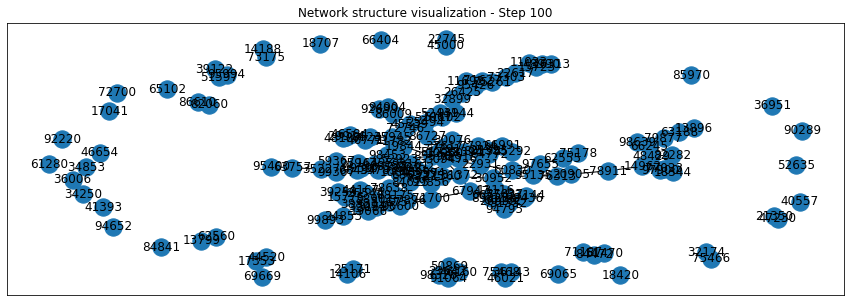

{10060: [85596, 51722], 10281: [15723], 10841: [88133, 63757, 39783, 40997, 53275, 68633, 11360, 68494, 22931, 86352], 11023: [15723], 11360: [10841, 40997, 53275, 30952], 11692: [11692, 95426, 99856], 13799: [62560], 13896: [63188], 14106: [25171], 14188: [31583, 16495, 53275], 14962: [97900, 77023, 78911, 48429], 15723: [10281, 11023, 15723, 16313], 15776: [25544], 16313: [15723], 16495: [14188, 16495, 68494, 24853, 52923], 18344: [97900, 77023], 18394: [25323, 77824, 85596, 74916], 19066: [19066, 96600, 24853], 19844: [45945, 46771, 71782, 50947], 20905: [95135, 76313, 78911], 21350: [47230], 22745: [45000], 22931: [10841, 22931, 60830, 50947], 23144: [57637, 78638, 98436], 23642: [98326, 50869, 91064, 46160], 24853: [99893, 19066, 16495], 25171: [14106], 25323: [18394, 64772], 25494: [52067, 51102, 72746], 25544: [15776, 78638], 25947: [59367, 88133], 26425: [95426, 32899], 26999: [13116, 94795], 29914: [46771, 46584, 48187], 30076: [37617], 30952: [11360, 60830, 95135, 13116], 313

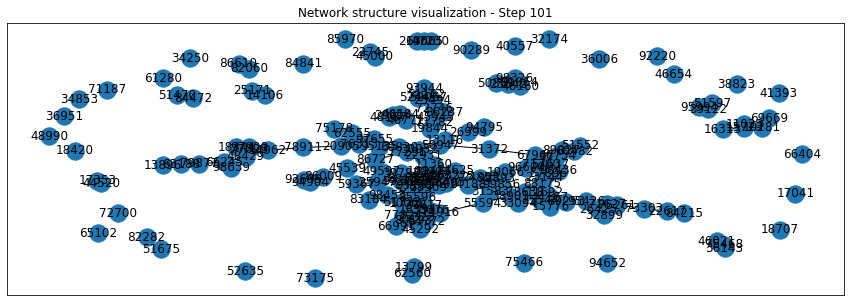

{10060: [85596, 51722], 10281: [15723], 10841: [88133, 63757, 39783, 40997, 53275, 68633, 11360, 68494, 22931, 86352, 49597], 11023: [15723], 11360: [10841, 40997, 30952], 11692: [11692, 95426, 99856], 13799: [62560], 13896: [63188], 14188: [31583, 16495, 53275], 14962: [97900, 77023, 78911, 48429], 15776: [25544], 16313: [15723], 16495: [14188, 16495, 68494, 13116, 24853, 52923], 18344: [97900, 77023, 25544], 18394: [25323, 77824, 85596, 74916], 19066: [19066, 96600, 38901], 19844: [45945, 71782, 50947], 20905: [95135, 76313, 78911], 21350: [47230], 22745: [45000], 22931: [10841, 22931, 60830, 50947], 23144: [57637, 78638, 98436], 23642: [98326, 50869, 91064, 46160], 24853: [99893, 16495], 25323: [18394, 64772], 25494: [52067, 51102], 25544: [15776, 18344, 86009, 78638, 52615], 25947: [59367, 88133], 26425: [95426, 32899], 26999: [13116, 94795], 29914: [46771, 46584, 48187], 30076: [37617], 30952: [95135, 13116, 11360], 31372: [67947, 50947], 31583: [14188, 38901], 32899: [26425], 330

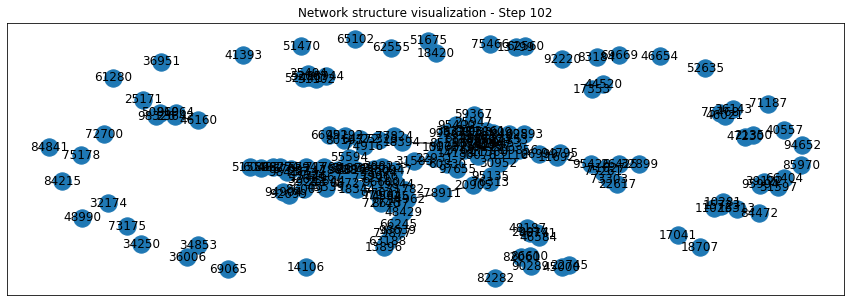

{10060: [85596, 51722], 10281: [15723], 10841: [88133, 63757, 39783, 40997, 53275, 68633, 11360, 68494, 22931, 86352, 49597], 11023: [15723], 11360: [10841, 40997, 30952], 11692: [11692, 95426, 99856], 13799: [62560], 13896: [63188, 77023], 14188: [31583, 16495, 53275], 14962: [97900, 77023, 78911], 15723: [10281, 11023, 15723, 16313], 16313: [15723], 16495: [14188, 16495, 68494, 13116, 24853, 52923], 18344: [97900, 77023, 25544], 18394: [25323, 77824, 85596, 74916], 19066: [19066, 96600, 38901], 19844: [45945, 71782, 50947], 20905: [95135, 76313, 78911], 21350: [47230], 22745: [45000], 22931: [10841, 22931, 60830, 50947], 23642: [98326, 50869, 91064, 46160], 24853: [99893, 16495], 25323: [18394, 64772], 25494: [52067, 51102], 25544: [18344, 86009, 78638, 15776, 52615], 25947: [59367, 88133], 26425: [95426, 32899], 26999: [13116, 94795], 29914: [46771, 46584, 48187], 30076: [37617], 30952: [95135, 13116, 11360], 31372: [67947, 50947], 31583: [14188, 38901], 32899: [26425], 33094: [3890

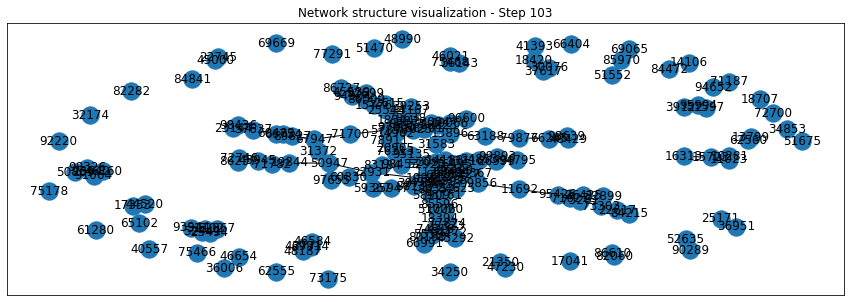

In [88]:
# Create epostemic network
alpha_payoff = 0.5
beta_payoff = 0.6
cons_threshold = 0.9
nr_trials = 10

g = DynamicEpistemicNetwork(step_to_adjacency_list_2[1], alpha_payoff, beta_payoff, cons_threshold, nr_trials)
plot_network(g, 'Network structure visualization - Step 1', (15, 5))
g.update_structure(step_to_adjacency_list_2[10])
plot_network(g, 'Network structure visualization - Step 10', (15, 5))
g.update_structure(step_to_adjacency_list_2[100])
plot_network(g, 'Network structure visualization - Step 100', (15, 5))
g.update_structure(step_to_adjacency_list_2[101])
plot_network(g, 'Network structure visualization - Step 101', (15, 5))
g.update_structure(step_to_adjacency_list_2[102])
plot_network(g, 'Network structure visualization - Step 102', (15, 5))
g.update_structure(step_to_adjacency_list_2[103])
plot_network(g, 'Network structure visualization - Step 103', (15, 5))

## Simulation on Cogsnet structures

In [89]:
# Init structures
alpha_payoff = 0.5
beta_payoff = 0.9
cons_threshold = 0.9
nr_trials = 100

base_network = DynamicEpistemicNetwork(step_to_adjacency_list_2[100], alpha_payoff, beta_payoff, cons_threshold, nr_trials)
next_structures = {k: step_to_adjacency_list_2[k] for k in range(101, 120)}

# Run simulation
s = CogsnetSimulation(network=base_network, nr_steps=100, cogsnets=next_structures)
sim_res = s.run()
print(sim_res)

2021-05-11 00:20:39,160 — src.epinet.agent — INFO — __init__:18  —  Agent 10060 created successfully!
2021-05-11 00:20:39,161 — src.epinet.agent — INFO — __init__:18  —  Agent 10841 created successfully!
2021-05-11 00:20:39,161 — src.epinet.agent — INFO — __init__:18  —  Agent 11023 created successfully!
2021-05-11 00:20:39,162 — src.epinet.agent — INFO — __init__:18  —  Agent 11360 created successfully!
2021-05-11 00:20:39,162 — src.epinet.agent — INFO — __init__:18  —  Agent 11692 created successfully!
2021-05-11 00:20:39,163 — src.epinet.agent — INFO — __init__:18  —  Agent 13799 created successfully!
2021-05-11 00:20:39,164 — src.epinet.agent — INFO — __init__:18  —  Agent 13896 created successfully!
2021-05-11 00:20:39,164 — src.epinet.agent — INFO — __init__:18  —  Agent 14106 created successfully!
2021-05-11 00:20:39,165 — src.epinet.agent — INFO — __init__:18  —  Agent 14962 created successfully!
2021-05-11 00:20:39,166 — src.epinet.agent — INFO — __init__:18  —  Agent 15776 cr

2021-05-11 00:20:39,214 — src.epinet.agent — INFO — __init__:18  —  Agent 62560 created successfully!
2021-05-11 00:20:39,214 — src.epinet.agent — INFO — __init__:18  —  Agent 63188 created successfully!
2021-05-11 00:20:39,215 — src.epinet.agent — INFO — __init__:18  —  Agent 63757 created successfully!
2021-05-11 00:20:39,216 — src.epinet.agent — INFO — __init__:18  —  Agent 64772 created successfully!
2021-05-11 00:20:39,216 — src.epinet.agent — INFO — __init__:18  —  Agent 65102 created successfully!
2021-05-11 00:20:39,217 — src.epinet.agent — INFO — __init__:18  —  Agent 66245 created successfully!
2021-05-11 00:20:39,217 — src.epinet.agent — INFO — __init__:18  —  Agent 66754 created successfully!
2021-05-11 00:20:39,218 — src.epinet.agent — INFO — __init__:18  —  Agent 66991 created successfully!
2021-05-11 00:20:39,219 — src.epinet.agent — INFO — __init__:18  —  Agent 67947 created successfully!
2021-05-11 00:20:39,219 — src.epinet.agent — INFO — __init__:18  —  Agent 68494 cr

{10060: [85596, 51722], 10281: [15723], 10841: [88133, 63757, 39783, 40997, 53275, 68633, 11360, 68494, 22931, 86352], 11023: [15723], 11360: [10841, 40997, 53275, 30952], 11692: [11692, 95426, 99856], 13799: [62560], 13896: [63188], 14106: [25171], 14188: [31583, 16495, 53275], 14962: [97900, 77023, 78911, 48429], 15723: [10281, 11023, 15723, 16313], 15776: [25544], 16313: [15723], 16495: [14188, 16495, 68494, 24853, 52923], 18344: [97900, 77023], 18394: [25323, 77824, 85596, 74916], 19066: [19066, 96600, 24853], 19844: [45945, 46771, 71782, 50947], 20905: [95135, 76313, 78911], 21350: [47230], 22745: [45000], 22931: [10841, 22931, 60830, 50947], 23144: [57637, 78638, 98436], 23642: [98326, 50869, 91064, 46160], 24853: [99893, 19066, 16495], 25171: [14106], 25323: [18394, 64772], 25494: [52067, 51102, 72746], 25544: [15776, 78638], 25947: [59367, 88133], 26425: [95426, 32899], 26999: [13116, 94795], 29914: [46771, 46584, 48187], 30076: [37617], 30952: [11360, 60830, 95135, 13116], 313

2021-05-11 00:20:39,489 — src.epinet.models — INFO — update_structure:194  —  Agents to detach: {82282, 75178, 34250, 51470, 83184, 25171, 71187, 51675, 84215, 84472, 14106, 62555}
2021-05-11 00:20:39,490 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {77824, 79877, 51722, 99856, 71700, 98326, 76313, 68633, 92699, 53275, 58909, 40997, 99367, 57896, 10281, 72746, 99893, 48187, 78911, 60482, 88133, 13896, 94795, 65102, 46160, 86610, 73303, 10841, 23642, 22617, 85596, 11360, 62560, 71782, 23144, 97900, 16495, 88175, 14962, 19066, 47230, 32899, 98436, 44167, 31372, 82060, 84625, 98453, 74916, 95400, 46771, 50869, 94904, 52923, 66754, 95426, 66245, 86727, 75468, 39122, 63188, 22745, 29914, 52441, 86237, 77023, 89827, 30952, 25323, 45292, 37617, 93944, 95994, 50947, 64772, 63757, 11023, 24853, 57637, 55594, 48429, 78638, 36143, 26425, 13116, 80193, 33094, 10060, 98639, 86352, 39253, 96600, 25947, 31583, 51552, 52067, 21350, 39783, 84841, 67947, 14188, 15723, 26999, 9

2021-05-11 00:20:39,607 — src.epinet.models — INFO — update_structure:196  —  Agents to create: set()
2021-05-11 00:20:39,607 — src.epinet.models — INFO — update_structure:196  —  Agents to create: set()
{10060: [85596, 51722], 10281: [15723], 10841: [88133, 39783, 40997, 53275, 68633, 11360, 68494, 22931, 86352, 49597], 11023: [15723], 11360: [10841, 40997, 30952], 11692: [11692, 99856], 13799: [62560], 13896: [63188, 77023], 14188: [31583, 16495, 53275], 14962: [97900, 77023, 78911], 15723: [10281, 11023, 15723, 16313], 15776: [25544], 16313: [15723], 16495: [14188, 16495, 68494, 13116, 52923], 18344: [97900, 77023, 25544], 18394: [25323, 77824, 85596, 74916], 19066: [19066, 96600, 38901], 19844: [45945, 71782, 50947], 20905: [95135, 76313, 78911, 97655], 21350: [47230], 22745: [45000], 22931: [10841, 22931, 60830, 50947], 23144: [57637, 78638, 98436], 23642: [98326, 50869, 91064, 46160], 24853: [99893], 25323: [18394, 64772], 25494: [51102, 52067], 25544: [15776, 18344, 86009, 78638

2021-05-11 00:20:39,836 — src.epinet.models — INFO — update_structure:194  —  Agents to detach: {51552, 44520, 82282, 75178, 34250, 77291, 51470, 83184, 93944, 25171, 71187, 51675, 84472, 14106, 62555, 30076}
2021-05-11 00:20:39,837 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {77824, 79877, 51722, 99856, 71700, 98326, 76313, 68633, 92699, 53275, 58909, 40997, 99367, 57896, 10281, 72746, 99893, 48187, 78911, 60482, 88133, 13896, 94795, 65102, 46160, 86610, 73303, 10841, 23642, 22617, 85596, 11360, 62560, 71782, 23144, 97900, 16495, 88175, 14962, 19066, 47230, 32899, 98436, 44167, 31372, 82060, 84625, 98453, 74916, 95400, 46771, 50869, 94904, 52923, 66754, 95426, 66245, 86727, 75468, 39122, 63188, 22745, 29914, 52441, 86237, 77023, 89827, 30952, 25323, 45292, 37617, 84215, 95994, 50947, 64772, 63757, 11023, 24853, 57637, 55594, 48429, 78638, 36143, 26425, 13116, 80193, 33094, 10060, 98639, 86352, 39253, 96600, 25947, 48990, 31583, 52067, 21350, 39783, 84841, 1

2021-05-11 00:20:39,955 — src.epinet.models — INFO — update_structure:196  —  Agents to create: {24760, 61280}
2021-05-11 00:20:39,955 — src.epinet.models — INFO — update_structure:196  —  Agents to create: {24760, 61280}
2021-05-11 00:20:39,956 — src.epinet.agent — INFO — __init__:18  —  Agent 24760 created successfully!
2021-05-11 00:20:39,956 — src.epinet.agent — INFO — __init__:18  —  Agent 61280 created successfully!
{10060: [85596], 10841: [88133, 39783, 40997, 11360, 68494, 22931, 49597], 11360: [10841, 40997], 11692: [11692, 99856], 13896: [63188, 77023], 14188: [31583, 53275], 14962: [68494, 97900, 77023], 15723: [15723, 16313], 16313: [15723], 16495: [16495, 68494, 52923], 17353: [57896], 18344: [97900, 77023], 18394: [77824, 85596, 25323, 74916], 19066: [19066, 96600], 19844: [71782, 50947, 45945], 20905: [95135, 76313, 78911, 97655], 21350: [47230], 22745: [45000], 22931: [10841, 22931, 60830, 50947], 23642: [98326, 50869, 91064, 46160], 24760: [61280], 24853: [99893, 33094

2021-05-11 00:20:40,197 — src.epinet.models — INFO — update_structure:194  —  Agents to detach: {11023, 71187, 25494, 14106, 10281, 75178, 36143, 34250, 25171, 51675, 62555, 51552, 13799, 44520, 93161, 77291, 83184, 84215, 93944}
2021-05-11 00:20:40,199 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {77824, 79877, 50181, 51722, 99856, 71700, 98326, 76313, 68633, 92699, 53275, 58909, 40997, 99367, 57896, 72746, 99893, 48187, 92220, 78911, 60482, 88133, 13896, 94795, 65102, 46160, 86610, 73303, 10841, 23642, 22617, 85596, 62560, 11360, 71782, 23144, 97900, 16495, 83568, 88175, 14962, 19066, 47230, 32899, 98436, 44167, 31372, 82060, 84625, 98453, 74916, 95400, 46771, 50869, 24760, 94904, 52923, 66754, 95426, 66245, 86727, 75468, 39122, 63188, 22745, 29914, 52441, 86237, 77023, 89827, 30952, 25323, 45292, 37617, 95994, 50947, 64772, 63757, 51470, 24853, 57637, 55594, 48429, 78638, 26425, 13116, 80193, 33094, 63817, 10060, 98639, 86352, 39253, 96600, 25947, 48990, 3

2021-05-11 00:20:40,323 — src.epinet.models — INFO — update_structure:196  —  Agents to create: {39701, 71518}
2021-05-11 00:20:40,323 — src.epinet.models — INFO — update_structure:196  —  Agents to create: {39701, 71518}
2021-05-11 00:20:40,325 — src.epinet.agent — INFO — __init__:18  —  Agent 39701 created successfully!
2021-05-11 00:20:40,326 — src.epinet.agent — INFO — __init__:18  —  Agent 71518 created successfully!
{10060: [85596], 10841: [88133, 40997, 68633, 11360, 68494, 84625], 11023: [15723], 11360: [10841, 40997], 11692: [11692, 99856], 13799: [45539], 13896: [63188, 77023], 14188: [31583], 14962: [68494, 97900, 77023], 15723: [11023, 15723], 15776: [25544], 16495: [16495, 68494, 52923, 88175], 17353: [57896], 18344: [97900, 77023], 19066: [19066, 96600], 19844: [45945, 71782], 20905: [95135, 78911, 97655], 21350: [47230], 22745: [45000], 22931: [22931, 60830, 50947], 23144: [57637, 98436, 26425], 23642: [98326, 91064, 46160], 24760: [50709, 61280], 24853: [99893, 33094], 

2021-05-11 00:20:40,573 — src.epinet.models — INFO — update_structure:194  —  Agents to detach: {50181, 71187, 50709, 14106, 52635, 58909, 38823, 10281, 75178, 36143, 16313, 34250, 94795, 25171, 62555, 51675, 62560, 51552, 44520, 26999, 93944}
2021-05-11 00:20:40,574 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {77824, 79877, 51722, 99856, 71700, 98326, 76313, 68633, 92699, 53275, 40997, 99367, 57896, 72746, 99893, 95798, 48187, 92220, 78911, 60482, 88133, 13896, 65102, 46160, 86610, 73303, 10841, 23642, 22617, 85596, 11360, 71782, 23144, 97900, 16495, 83568, 88175, 14962, 19066, 47230, 32899, 98436, 44167, 31372, 82060, 84625, 98453, 74916, 95400, 46771, 50869, 24760, 94904, 52923, 66754, 95426, 66245, 86727, 75468, 39122, 63188, 22745, 29914, 52441, 86237, 77023, 89827, 30952, 25323, 45292, 83184, 37617, 84215, 95994, 50947, 64772, 63757, 51470, 11023, 24853, 39701, 57637, 55594, 48429, 78638, 26425, 13116, 80193, 33094, 63817, 10060, 98639, 86352, 39253, 9

2021-05-11 00:20:40,701 — src.epinet.models — INFO — update_structure:196  —  Agents to create: set()
2021-05-11 00:20:40,701 — src.epinet.models — INFO — update_structure:196  —  Agents to create: set()
{10060: [85596, 51722], 10841: [88133, 39783, 40997, 68633, 11360, 84625], 11023: [15723], 11360: [10841, 40997], 11692: [11692, 95426], 13799: [77291, 45539], 13896: [63188, 77023], 14188: [31583], 14962: [68494, 97900, 77023], 15776: [25544], 16495: [16495, 68494, 52923, 88175], 18344: [97900, 77023], 18394: [25323, 77824], 19066: [19066, 96600, 24853], 19844: [45945, 71782], 20905: [95135, 76313, 78911], 21350: [47230], 22745: [45000], 22931: [22931, 60830, 50947], 23144: [57637, 98436, 26425, 23642], 23642: [23144, 98326, 91064, 46160], 24760: [61280], 24853: [19066, 99893, 33094], 25323: [18394, 64772], 25494: [52067], 25544: [15776, 57637, 86009, 78638, 67947], 25947: [59367, 88133], 26425: [23144, 95426, 32899], 29914: [46771, 48187], 30076: [37617], 30952: [60830], 31372: [6794

2021-05-11 00:20:40,945 — src.epinet.models — INFO — update_structure:194  —  Agents to detach: {52615, 71187, 14106, 58909, 10281, 55594, 75178, 41393, 16313, 13116, 63817, 17353, 94795, 34250, 25171, 51675, 62560, 51552, 66404, 44520, 26999, 93944}
2021-05-11 00:20:40,947 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {77824, 79877, 50181, 51722, 99856, 71700, 50709, 98326, 76313, 68633, 92699, 53275, 40997, 99367, 57896, 72746, 99893, 95798, 48187, 92220, 78911, 60482, 88133, 13896, 65102, 46160, 86610, 73303, 10841, 23642, 62555, 85596, 22617, 11360, 71782, 23144, 97900, 16495, 83568, 88175, 14962, 19066, 47230, 32899, 98436, 44167, 31372, 82060, 84625, 98453, 74916, 95400, 46771, 50869, 24760, 94904, 52923, 66754, 95426, 66245, 86727, 75468, 39122, 63188, 22745, 29914, 52441, 86237, 77023, 89827, 30952, 25323, 45292, 83184, 37617, 84215, 95994, 50947, 64772, 63757, 51470, 11023, 24853, 39701, 57637, 48429, 78638, 36143, 26425, 80193, 33094, 10060, 98639, 8

2021-05-11 00:20:41,071 — src.epinet.models — INFO — update_structure:196  —  Agents to create: set()
2021-05-11 00:20:41,071 — src.epinet.models — INFO — update_structure:196  —  Agents to create: set()
{10060: [85596, 51722], 10841: [88133, 39783, 40997, 11360, 84625, 68494], 11023: [15723], 11360: [10841, 40997], 11692: [11692, 95426], 13799: [77291, 45539], 13896: [63188, 77023], 14188: [31583], 14962: [68494, 48429, 97900, 77023, 26127], 15776: [25544], 16313: [15723], 16495: [16495, 68494, 52923, 88175], 18344: [97900, 77023], 18394: [25323, 77824], 19066: [19066, 96600, 24853, 71700], 19844: [45945, 71782], 20905: [95135, 76313, 78911], 21350: [47230], 22745: [45000], 22931: [22931, 50947, 30076, 60830], 23144: [57637, 98436, 23642, 88133, 76313], 23642: [23144, 98326, 91064, 46160], 24853: [99893, 19066, 33094], 25323: [18394, 64772], 25494: [52067], 25544: [15776, 57637, 86009, 78638, 67947], 25947: [59367, 46160, 88133], 26425: [95426, 32899], 29914: [46771, 48187], 30076: [2

2021-05-11 00:20:41,318 — src.epinet.models — INFO — update_structure:194  —  Agents to detach: {52615, 71187, 14106, 58909, 10281, 55594, 75178, 36143, 41393, 13116, 17353, 34250, 94795, 25171, 52441, 51675, 62560, 66404, 44520, 84841, 26999, 93944}
2021-05-11 00:20:41,319 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {77824, 79877, 50181, 51722, 26127, 99856, 71700, 50709, 98326, 76313, 68633, 92699, 53275, 40997, 99367, 57896, 72746, 99893, 95798, 48187, 92220, 78911, 60482, 88133, 13896, 65102, 46160, 86610, 73303, 10841, 23642, 62555, 85596, 22617, 11360, 71782, 23144, 97900, 16495, 88175, 83568, 14962, 19066, 47230, 32899, 98436, 44167, 31372, 82060, 84625, 98453, 74916, 95400, 46771, 50869, 24760, 94904, 52923, 66754, 95426, 66245, 86727, 75468, 39122, 63188, 22745, 29914, 86237, 77023, 89827, 30952, 25323, 45292, 83184, 37617, 84215, 95994, 50947, 64772, 63757, 51470, 11023, 24853, 39701, 57637, 48429, 78638, 26425, 80193, 33094, 63817, 10060, 98639, 8

2021-05-11 00:20:41,446 — src.epinet.models — INFO — update_structure:195  —  Agents to update: {77824, 79877, 50181, 51722, 26127, 99856, 71700, 50709, 98326, 76313, 68633, 92699, 53275, 40997, 99367, 57896, 72746, 99893, 95798, 48187, 92220, 78911, 60482, 88133, 13896, 65102, 46160, 86610, 73303, 10841, 23642, 62555, 85596, 22617, 11360, 71782, 23144, 97900, 16495, 83568, 88175, 14962, 19066, 47230, 32899, 98436, 44167, 31372, 82060, 17041, 84625, 98453, 74916, 95400, 46771, 50869, 94904, 52923, 66754, 95426, 66245, 86727, 75468, 39122, 63188, 22745, 29914, 52441, 86237, 77023, 89827, 30952, 25323, 45292, 83184, 37617, 84215, 95994, 50947, 64772, 63757, 51470, 11023, 24853, 39701, 57637, 48429, 78638, 36143, 26425, 80193, 33094, 10060, 98639, 86352, 39253, 96600, 25947, 48990, 31583, 71518, 51552, 52067, 21350, 39783, 82282, 67947, 15723, 97655, 45945, 30076, 19844, 46584, 51597, 68494, 22931, 25494, 35227, 52635, 51102, 60830, 15776, 95135, 38823, 18344, 20905, 32174, 66991, 91064, 

2021-05-11 00:20:41,576 — src.epinet.models — INFO — update_structure:196  —  Agents to create: {36006}
2021-05-11 00:20:41,577 — src.epinet.agent — INFO — __init__:18  —  Agent 36006 created successfully!
[('Correct Disagreement', 2, 150, 0.9903072845470818, 36, 0, 113, 'Correct Disagreement', 0, 113, 0.9977078861394234), ('Correct Disagreement', 2, 150, 0.9903072845470818, 36, 1, 3, 'Correct Consensus', 0, 3, 1.0), ('Correct Disagreement', 2, 150, 0.9903072845470818, 36, 2, 9, 'Correct Consensus', 0, 9, 1.0), ('Correct Disagreement', 2, 150, 0.9903072845470818, 36, 3, 5, 'Correct Consensus', 0, 5, 1.0), ('Correct Disagreement', 2, 150, 0.9903072845470818, 36, 4, 2, 'Incorrect Consensus', 2, 0, 0.3928580587007995), ('Correct Disagreement', 2, 150, 0.9903072845470818, 36, 5, 8, 'Correct Consensus', 0, 8, 1.0), ('Correct Disagreement', 2, 150, 0.9903072845470818, 36, 6, 3, 'Correct Consensus', 0, 3, 1.0), ('Correct Disagreement', 2, 150, 0.9903072845470818, 36, 7, 1, 'Correct Consensus'

In [43]:
s.network.get_mean_credence()

0.6544695984109214

In [44]:
s.network.get_actions_voters_nr()

(72, 84)

In [51]:
import numpy as np
np.mean([a.credence for a in s.network.id_to_agents.values() if len(a.neighbors) == 0])

0.6007188140319306

# Expermients

In [54]:
import networkx as nx
from networkx.algorithms.components import connected_components

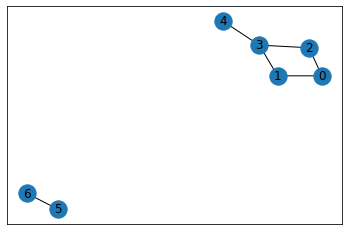

In [57]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (3, 4), (2, 3), (5, 6)])
nx.draw_networkx(G, with_labels=True)

In [58]:
[cc for cc in connected_components(G)]

[{0, 1, 2, 3, 4}, {5, 6}]

In [ ]:
for cc in connected_components(G):
    